In [3]:
import csv                       # imported csv
import matplotlib.pyplot as plt  #imported matplotlib
import glob                     #imported glob 
file_list = glob.glob(r'C:\Users\Shephali Mahajan\AppData\Roaming\nltk_data\corpora\gutenberg\*')  # storing readeable files in a variable

In [28]:
for x in file_list:         #for loop to read every file of the corpus
    with open(x, 'r') as f:  #open filles
        lines=f.read()      
        lines_split = lines.split()     # split method to read the file in lines format
        file_lower = [words.lower() for words in lines_split]    #lowercase all words of the files
        total_word_count = len(file_lower)    # finding the word count
        freq_words = calc_freq(file_lower);    # calling user defined function calc_freq()
        percent_word = round(len(freq_words)*0.20)   # finding 20% words
        frq_words = FreqDist(freq_words)             #use of freqdist method 
        top_words = frq_words.most_common(percent_word) #finding most common words
        dict_words = dict(top_words)   #store top_words
        freq_top_words = sum(dict_words.values())  #summing the values
        Zipf_law_calc = (freq_top_words/total_word_count)*100    #Applying zipf's calculations
        sorted_list = sorted(freq_words.items(), key = lambda x:x[1], reverse = True)  #use of lambda function to sort list
        with open(x[70:-4]+('.csv'), 'w', newline="") as csvfile:   # opening files
            csv_output = csv.writer(csvfile)
            csv_output.writerow(['Word', 'Freq', 'Rank'])   # creating columns to save data
            rank = 1   #initializing the rank
            for row in sorted_list:  # for loop to check and increment ranks
                csv_output.writerow([row[0], row[1], rank])
                rank +=1
                csvfile.close
        print('File ', x ,':', Zipf_law_calc)    # print the files and corresponding Zipf's calculatio

File  C:\Users\Shephali Mahajan\AppData\Roaming\nltk_data\corpora\gutenberg\austen-emma.txt : 88.68474460538545
File  C:\Users\Shephali Mahajan\AppData\Roaming\nltk_data\corpora\gutenberg\austen-persuasion.txt : 85.82369040188217
File  C:\Users\Shephali Mahajan\AppData\Roaming\nltk_data\corpora\gutenberg\austen-sense.txt : 87.43121971771646
File  C:\Users\Shephali Mahajan\AppData\Roaming\nltk_data\corpora\gutenberg\bible-kjv.txt : 93.15129217800283
File  C:\Users\Shephali Mahajan\AppData\Roaming\nltk_data\corpora\gutenberg\blake-poems.txt : 70.35792549306062
File  C:\Users\Shephali Mahajan\AppData\Roaming\nltk_data\corpora\gutenberg\bryant-stories.txt : 83.13255631903975
File  C:\Users\Shephali Mahajan\AppData\Roaming\nltk_data\corpora\gutenberg\burgess-busterbrown.txt : 81.27284183994959
File  C:\Users\Shephali Mahajan\AppData\Roaming\nltk_data\corpora\gutenberg\carroll-alice.txt : 80.75483114623908
File  C:\Users\Shephali Mahajan\AppData\Roaming\nltk_data\corpora\gutenberg\chesterton

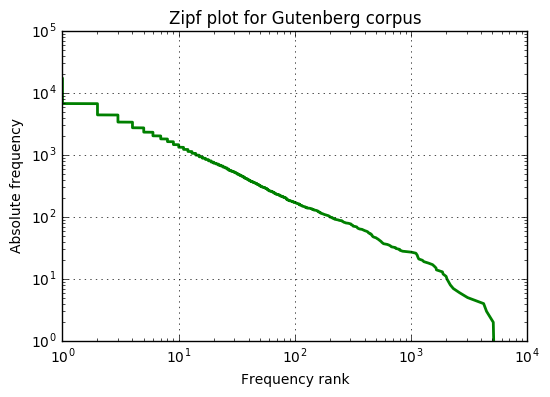

In [29]:
csvfile = open('austen-emma.csv', 'r') # creating csv file
w=[]
f=[]
r=[]
csv_f=csv.reader(csvfile)    #reading the file
for row in csv_f:            # for loop to insert values
    w.append(row[0])
    f.append(row[1])
    r.append(row[2])
r.pop(0)
f.pop(0)
plt.loglog(f,r,color='g',linewidth=2)  #plotting the graph
plt.grid(True)
plt.title("Zipf plot for Gutenberg corpus")  #  graph labelling
plt.xlabel("Frequency rank")                 #  graph labelling
plt.ylabel("Absolute frequency")             #  graph labelling
plt.show()    #display graph

In [25]:
def calc_freq(file):     # creating a function to count and store the word frequency and calling the function in the main program
    frequency = {}        #crearing an empty list
    for y in file:
        if y not in frequency:
            frequency[y] = 1
        else:
            frequency[y] += 1
    return frequency